In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

path = "../scores"

dfs = []



# Loop over all CSV files in the scores folder

In [3]:
for file in glob.glob(os.path.join(path, "*.csv")):
    df = pd.read_csv(file)
    model_name = os.path.splitext(os.path.basename(file))[0].replace("model_scores_", "")
    df["Model"] = model_name
    dfs.append(df)

results_df = pd.concat(dfs)


# Pivot so metrics are columns

In [4]:
results_pivot = results_df.pivot(index="Model", columns="Metric", values="Score").reset_index()

# Sort by ROC AUC for ranking

In [5]:
results_pivot = results_pivot.sort_values(by="ROC AUC", ascending=False)

In [6]:
print(results_pivot)

Metric          Model  Accuracy  F1 Score   ROC AUC
4                  nn  0.906000  0.729885  0.937665
0                 ann  0.880667  0.737537  0.935991
2            logistic  0.836000  0.656425  0.887534
3                 mlp  0.908000  0.749091  0.830009
1       decision_tree  0.904000  0.739130  0.824944
5                  rf  0.894000  0.714029  0.811637
6                 svc  0.905667  0.727097  0.805998


# Plot comparison

<Figure size 1000x600 with 0 Axes>

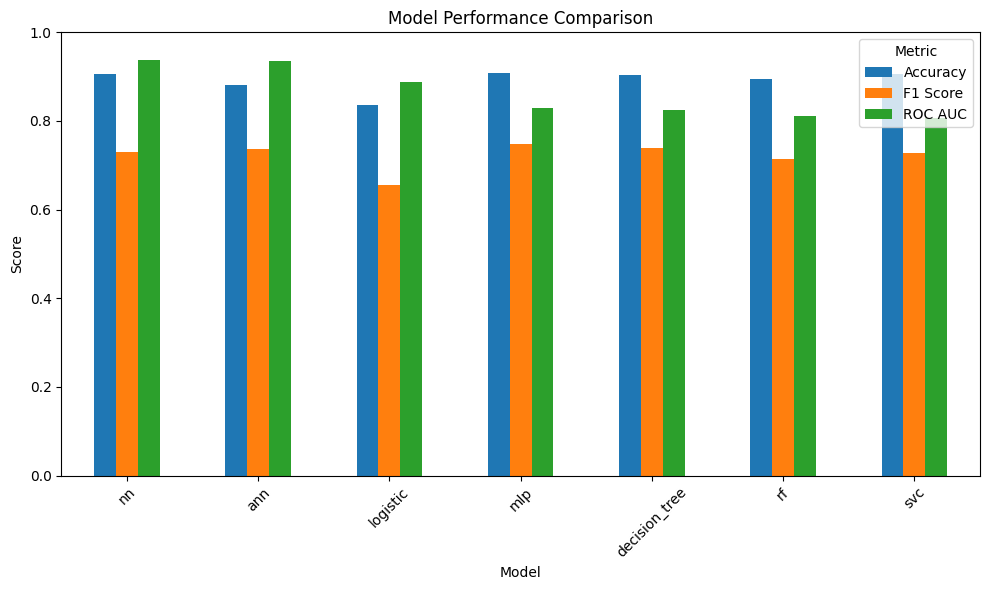

In [7]:

plt.figure(figsize=(10, 6))
results_pivot.plot(x="Model", y=["Accuracy", "F1 Score", "ROC AUC"], kind="bar", figsize=(10,6))
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.savefig("model_comparison.png", dpi=300, bbox_inches="tight")
plt.show()